#### Instructions

What You're Aiming For

In this checkpoint, we are going to work on 'Customer purchases history' dataset provided by Kaggle

Dataset description: This dataset contains historical records for customer purchases from a supermarket X. The objective is to find the association rules to help supermarket owners find new marketing plans to improve their sales.

➡️ Dataset link

🚧 Each row correspond to one purchase

https://i.imgur.com/uYpSaHm.png


Instructions

toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Run the apriori algorithm on the provided toy_dataset. Interpret the results.
Try to explore the checkpoint dataset using Pandas and Plotly.
Run the apriori algorithm on checkpoint dataset. Interpret the results and suggest a clear business plan to the supermarket owners based on your findings.

In [19]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [16]:
# Load the dataset
file_path = 'Market_Basket_Optimisation.csv'
df = pd.read_csv(file_path)

In [17]:
# Show the first few rows of the dataset to understand its structure
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(7500, 20)

In [20]:
# Step 2: Prepare the toy dataset
toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
               ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
               ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
               ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels'],
               ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]


In [21]:
# Convert toy dataset to a DataFrame of one-hot encoding (binary matrix)
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(toy_dataset).transform(toy_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [22]:
# Step 3: Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

In [23]:
# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [24]:
# Display the results
print(frequent_itemsets)
print(rules)

   support        itemsets
0      0.6           (Hat)
1      0.8         (Pants)
2      0.8         (Scarf)
3      0.6         (Skirt)
4      0.6  (Pants, Scarf)
5      0.6  (Pants, Skirt)
  antecedents consequents  antecedent support  consequent support  support  \
0     (Pants)     (Skirt)                 0.8                 0.6      0.6   
1     (Skirt)     (Pants)                 0.6                 0.8      0.6   

   confidence  lift  leverage  conviction  zhangs_metric  
0        0.75  1.25      0.12         1.6            1.0  
1        1.00  1.25      0.12         inf            0.5  


In [25]:
# Assuming the dataset is in CSV format (adjust if it's a different format)
data = pd.read_csv('Market_Basket_Optimisation.csv')

In [26]:
# Step 2: Explore the dataset
print(data.head())
print(data.info())


           shrimp    almonds     avocado    vegetables mix green grapes  \
0         burgers  meatballs        eggs               NaN          NaN   
1         chutney        NaN         NaN               NaN          NaN   
2          turkey    avocado         NaN               NaN          NaN   
3   mineral water       milk  energy bar  whole wheat rice    green tea   
4  low fat yogurt        NaN         NaN               NaN          NaN   

  whole weat flour yams cottage cheese energy drink tomato juice  \
0              NaN  NaN            NaN          NaN          NaN   
1              NaN  NaN            NaN          NaN          NaN   
2              NaN  NaN            NaN          NaN          NaN   
3              NaN  NaN            NaN          NaN          NaN   
4              NaN  NaN            NaN          NaN          NaN   

  low fat yogurt green tea honey salad mineral water salmon antioxydant juice  \
0            NaN       NaN   NaN   NaN           NaN    NaN

In [27]:
# Since each row is a transaction, we can flatten the dataset to count product occurrences
all_products = data.stack().reset_index(drop=True)  # Stack to convert to a single column of products

# Drop any NaN values that might exist in the dataset
all_products = all_products.dropna()

# Step 3: Visualize basic patterns
import plotly.express as px

# Example: Count of purchases for each product
product_counts = all_products.value_counts()
fig = px.bar(product_counts[:10], x=product_counts.index, y=product_counts.values, title="Top 10 Most Purchased Products")
fig.show()

c:\Users\HARDEY\anaconda3\Lib\site-packages\plotly\express\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
c:\Users\HARDEY\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\HARDEY\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



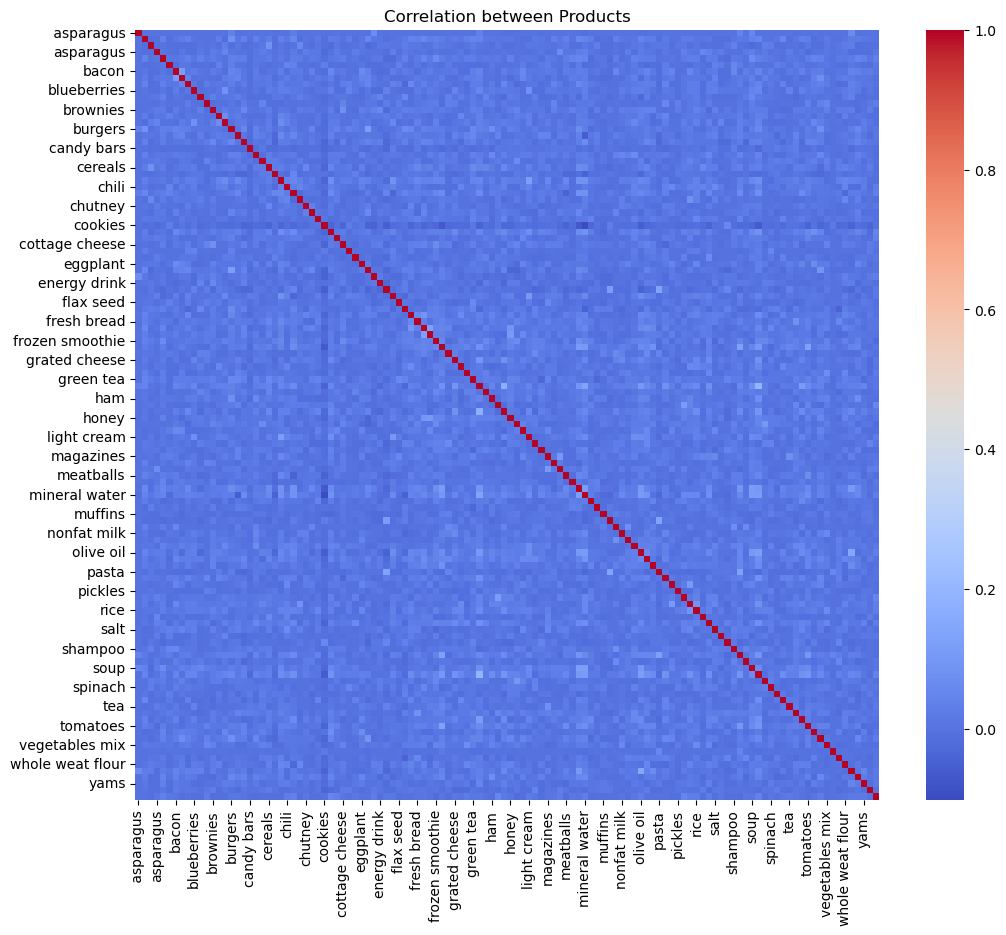

In [28]:
# Example: Correlation heatmap for co-purchased items
# Since we don't have 'TransactionID' explicitly, we'll create a pivot table for co-occurrences.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a co-occurrence matrix
# Pivoting over each transaction to check co-occurrence of items
from mlxtend.preprocessing import TransactionEncoder

# Step 4: Convert transactions into a list of lists for co-occurrence
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# Use TransactionEncoder to encode the transactions into a one-hot format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

# Calculate the correlation matrix
corr_matrix = df_onehot.corr()

# Step 5: Visualize the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation between Products")
plt.show()

In [29]:
# Convert each row into a list of items, ignoring NaN values
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# Step 2: Apply TransactionEncoder and transform the transactions into a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Apply the Apriori algorithm
# Use a minimum support of 5% (0.05)
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 5: Display the results
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules)

Frequent Itemsets:
      support                    itemsets
0   0.087200                   (burgers)
1   0.081067                      (cake)
2   0.060000                   (chicken)
3   0.163867                 (chocolate)
4   0.080400                   (cookies)
5   0.051067               (cooking oil)
6   0.179733                      (eggs)
7   0.079333                  (escalope)
8   0.170933              (french fries)
9   0.063200           (frozen smoothie)
10  0.095333         (frozen vegetables)
11  0.052400             (grated cheese)
12  0.132000                 (green tea)
13  0.098267               (ground beef)
14  0.076400            (low fat yogurt)
15  0.129600                      (milk)
16  0.238267             (mineral water)
17  0.065733                 (olive oil)
18  0.095067                  (pancakes)
19  0.071333                    (shrimp)
20  0.050533                      (soup)
21  0.174133                 (spaghetti)
22  0.068400                  (tomato

Interpretation of Results
Frequent Itemsets:

Top Products: The analysis reveals that products like burgers, cake, chicken, chocolate, cookies, and eggs have the highest support values. This indicates that these items are frequently purchased by customers.
Mineral Water: Mineral water appears to be a staple item, as it has the highest support (23.83%) and is often purchased alongside various other products.
Association Rules:

Chocolate and Mineral Water: The association between chocolate and mineral water is strong, with a lift of 1.35, suggesting that customers who buy chocolate are likely to purchase mineral water as well.
Eggs and Mineral Water: Eggs also have a significant association with mineral water, which could indicate that customers prefer to buy these items together.
Spaghetti and Mineral Water: There is a similar trend with spaghetti, which indicates that meal-related items are often bought with mineral water.
Customer Preferences:

There is a clear indication that products with higher purchase frequency (like eggs, chocolate, and mineral water) drive customer choices and can be leveraged in marketing strategies.
Business Plan Suggestions
Product Placement Strategy:

Cross-Merchandising: Position chocolate, eggs, and spaghetti near mineral water displays. Use attractive signage that suggests pairing these items, promoting convenience for customers who often buy them together.
End-Cap Displays: Create themed displays at the ends of aisles featuring popular item combinations, like chocolate and mineral water, to draw attention and boost impulse buying.
Promotions and Discounts:

Bundle Offers: Develop promotional bundles that combine frequently purchased items (e.g., eggs, mineral water, and chocolate). Offering a discount for purchasing these items together can encourage larger basket sizes.
Loyalty Program: Implement a loyalty program that rewards customers for purchasing frequently bought items. For instance, buying chocolate and mineral water together could earn points for discounts on future purchases.
Product Assortment:

Expand Product Range: Based on the data, consider expanding the variety of products in high-support categories like snacks (cookies, chocolate) and beverages (mineral water) to cater to diverse customer preferences.
Healthier Alternatives: Introduce healthy options or organic alternatives for popular items like chocolate and snacks to cater to health-conscious consumers, aligning with current trends.
Marketing Campaigns:

Targeted Marketing: Utilize data insights to create targeted marketing campaigns that emphasize the benefits of pairing products (e.g., healthy meals with mineral water).
Seasonal Promotions: Align promotions with seasonal trends, focusing on high-demand items (like chocolate during holidays) to maximize sales during peak times.
In-Store Events:

Sampling Events: Host tasting events or cooking demonstrations featuring recipes that incorporate popular items like eggs, spaghetti, and chocolate, promoting their usage together.
Customer Engagement: Create engaging content on social media that highlights meal ideas or snack pairings, directing customers to in-store displays for those products.
Feedback Mechanism:

Customer Surveys: Implement regular customer feedback surveys to refine product offerings and discover new customer preferences or shopping habits, ensuring that inventory aligns with demand.